https://colab.research.google.com/drive/1BF1-l9Dja192o7NYzCO_uQ1vQaVhbguP
# **Lab 5: Quadrature**
**Patrik Svensson**

# **Abstract**

In this report we are introduced to the concept of quadrature. Quadrature is a method of approximating integrals. In this report there are four different types of types of quadrature algorithms implemented:



1.   Gauss Quadrature
2.   3-point edge midpoint quadrature over a triangle
3.   Monte Carlo quadrature over a unit interval
4.   Monte Carlo quadrature over a unit triangle

The results are complete implementations togheter with unit tests.



# **Set up environment**

To set up the environment, run the two following lines of code.

In [0]:
import numpy as np
import unittest
import math
from random import seed
from random import randint
import random 
from sympy import *
import matplotlib.pyplot as plt
import scipy.integrate as integrate

# **Introduction**

Quadrature is the process of approximating an integral. In this lab I'm exploring three different methods to achive this *Gauss Quadrature*, *3-point edge midpoint quadrature over reference triangle*, *Monte Carlo quadrature over unit interval*, *Monte Carlo quadrature over reference triangle*.  


# **Methods**
In this chapter, I will present how the implementation of the functions was conducted. The study was conducted in the following way.

1.   Literature research
2.   Implementation
3.   Testing

In the sections below, I have provided a reference to where the algorithms were founded, or how it was deduced, followed with a code implementation in Python, and lastly unit test for the assurance of the accuracy of the implementations.


##  Gauss Quadrature
From (11.4) in the lecture notes, it's possible to extract the following equation. 

$\sum_{j=0}^{n-1}\varphi_i(x_j)w_j = \int^b_a \varphi_i(x)dx$, for $i=0,...,q$

In our case where we set $b = 1$ and $a = -1$. And since it's a two point Gauss Quadrature, we set $n = 2$. $q$ is set to 3 since we accept a polynomial of the degree 3. Since we accept a polynomial of degree 3, we have the following set as our polynomial basis:

$\varphi_0 = 1$

$\varphi_1 = x$

$\varphi_2 = x^2$

$\varphi_3 = x^3$

Hence we get an equation system:

$w_0 + w_1 = \int_{-1}^{1}1dx$

$x_0w_0 + x_1w_1 = \int_{-1}^{1}xdx$

$x_0^2w_0 + x_1^2w_1 = \int_{-1}^{1}x^2dx$

$x_0^3w_0 + x_1^3w_1 = \int_{-1}^{1}x^3dx$

We get:

$w_0 + w_1 - 2 = 0$

$x_0w_0 + x_1w_1 = 0$

$x^2_0w_0 + x^2_1w_1 - 2/3 = 0$

$x^3_0w_0 + x^3_1w_1 = 0$

If we solve the equation system we get:

$w_0 = w_1 = 1$

$x_0 = \frac{1}{\sqrt{3}}$

$x_1 = \frac{-1}{\sqrt{3}}$

This will estimate integrals that are using polynomials up to degree 3 exactly. All degrees above will be an approximation.

In [0]:
def gauss_quadrature_two_point(function):
  w0 = 1
  w1 = 1
  x0 = 1 / math.sqrt(3)
  x1 = -1 / math.sqrt(3)

  return function(x0) * w0 + function(x1) * w1

The code below is unit test for assurance of the quality of the gauss quadrature implementation above.

In [0]:
class TestGaussQuadrature(unittest.TestCase):
  def test_third_degree_polynomial(self):
    for i in range(100):
      # Arrange
      a = randint(0, 100)
      b = randint(0, 100)
      c = randint(0, 100)
      d = randint(0, 100)
      function = lambda x: a*x**3 + b*x**2 + c*x + d
      expected_result = integrate.quad(function, -1, 1)[0]

      # Act
      result = gauss_quadrature_two_point(function)

      # Assert
      self.assertAlmostEqual(expected_result, result)

if __name__ == '__main__':
    # Help from user Pierre S. in the stack overflow thread to give the main arguments: 
    # https://stackoverflow.com/questions/49952317/python3-for-unit-test-attributeerror-module-main-has-no-attribute-kerne 
    unittest.main(argv=['first-arg-is-ignored'], exit=False)

## 3-point edge midpoint quadrature over a triangle
Since we are woking in a two dimensional space, let's represent each point in the plane with $v = (x, y)$. This method is similar to the previous assignment, except that are domain has gone from $R$ to $R^2$. Our domain is a unit triangle, in other words, the triangle made from the points (0,0), (1,0), (0,1). The equation to solve is similar to the one we used in the previous assignment:

$\sum_{j=0}^{n-1}\varphi_i(x_j)w_j = \int^b_a \varphi_i(x)dx$, for $i=0,...,q$

But with the only difference that we are using it in $R^2$, hence we get:

$\sum_{j=0}^{n-1}\varphi_i(v_j)w_j = \int_D \varphi_i(v)dx$, for $i=0,...,q$ 

where $D$ is our domain to integrate over. Our basis to the problem is the following:

$\varphi_0(v) = 1$

$\varphi_1(v) = x$

$\varphi_2(v) = y$

$\varphi_3(v) = xy$

$\varphi_4(v) = x^2$

$\varphi_5(v) = y^2$

Which gives us $q = 5$

By solving the equation above, we get the following values.

$w_0 = 1/6$

$w_1 = 1/6$

$w_2 = 1/6$

$x_0 = 0$

$y_0 = 0.5$

$x_1 = 0.5$

$y_1 = 0.5$

$x_2 = 0.5$

$y_2 = 0.5$

These $w$ values are motivated the same way as example 11.5 from the lecture notes. Since the points are placed on the middle of its edge, and all edges are equally long, this symmetry give us that all $w$ values will be the same.

In [0]:
def three_point_edge_quadrature_triangle(function):
  w0 = 1 / 6
  w1 = 1 / 6
  w2 = 1 / 6
  x0 = 0
  y0 = 0.5
  x1 = 0.5
  y1 = 0 
  x2 = 0.5
  y2 = 0.5

  return function(y0, x0) * w0 + function(y1, x1) * w1 + function(y2, x2) * w2

The code below is unit test for assurance of the quality of the 3-point edge midpoint quadrature over a triangle implementation above.

In [0]:
class TestThreePointEdgeQuadrature(unittest.TestCase):
  def test_third_degree_polynomial(self):
    for i in range(100):
      # Arrange
      a = randint(0, 100)
      b = randint(0, 100)
      c = randint(0, 100)
      d = randint(0, 100)
      e = randint(0, 100)
      f = randint(0, 100)
      function = lambda y, x: a*x**2 + b*y**2 + c*x*y + d*x + e*y + f 
      lower_integrand = lambda x: 0
      upper_integrand = lambda x: 1 - x
      expected_result = integrate.dblquad(function, 0, 1, lower_integrand, upper_integrand)[0]

      # Act
      result = three_point_edge_quadrature_triangle(function)

      # Assert
      self.assertAlmostEqual(expected_result, result)

if __name__ == '__main__':
    # Help from user Pierre S. in the stack overflow thread to give the main arguments: 
    # https://stackoverflow.com/questions/49952317/python3-for-unit-test-attributeerror-module-main-has-no-attribute-kerne 
    unittest.main(argv=['first-arg-is-ignored'], exit=False)

## Monte Carlo quadrature 
When approximating a integral it is possible to use stochastic methods, hence we are using random variables. According to the lecture notes in section 12.4, we can use the following formula to approximate an integral. 

$\int_D g(x) \approx \frac{1}{n}\sum_{i=1}^ng(x_i)|D| = \frac{|D|}{n}\sum_{i=1}^ng(x_i)$

$D$ is the domain we are integrating over, in our case the unit interval $[0,1]$. $g(x)$ is a function. $n$ is the number of datapoint samples $x_i$ we have uniformly taken from $D$. The more datapoint samples we are taking, the more accurate the approximation will be. The code below is an implementation of the formula in python.

In [0]:
def monte_carlo_quadrature(g, n):
  D = 1
  sum = 0

  for i in range(n):
    x = random.uniform(0, 1)
    sum += g(x)
  
  return sum / n

The graph presented below shows that the alorithm converges faster than $\frac{1}{\sqrt{n}}$.

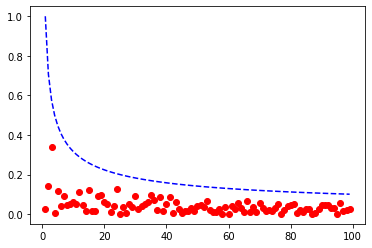

In [83]:
function = lambda x: x**2 
expected_result = integrate.quad(function, 0, 1)[0]
t = np.arange(1., 100., 1.0)
for n in range(1, 100):
  plt.plot(n, abs(monte_carlo_quadrature(function, n) - expected_result), 'ro')
plt.plot(t, t**(-1/2), 'b--')
plt.show()


## Monte Carlo quadrature over reference triangle
Simlar to Monte Carlo quadrature over a unit interval, the only difference now is that we go from $R$ to $R^2$, and our $D$ is the unit triangle (the triangle made of (0,0), (1,0), (0,1)). We can use the same formula used in the previous assignments.

$\int_D g(x) \approx \frac{1}{n}\sum_{i=1}^ng(x_i)|D| = \frac{|D|}{n}\sum_{i=1}^ng(x_i)$

The only major difference is that $x$ is an vector with two components. We also need to pick random datapoints uniformly from the unit triangle.

In [0]:
def monte_carlo_quadrature_triangle(g, n):
  sum = 0
  for i in range(n):
    x = random.uniform(0, 1)
    y = random.uniform(0, 1 - x)
    sum += g(x, y)
  
  return 0.5*(sum / n)

The graph presented below shows that the alorithm converges faster than $\frac{1}{\sqrt{n}}$.

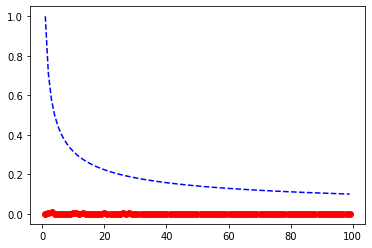

In [79]:
g = lambda x, y: x**2*y**2
lower_integrand = lambda x: 0
upper_integrand = lambda x: 1 - x
expected_result = integrate.dblquad(g, 0, 1, lower_integrand, upper_integrand)[0]    

t = np.arange(1., 100., 1.0)
for n in range(1, 100):
  plt.plot(n, abs(monte_carlo_quadrature_triangle(g, n) - expected_result), 'ro')
plt.plot(t, t**(-1/2), 'b--')
plt.show()


# **Results**
The result is the implementations above. Run the unit test below to assure the correctness. The graphs in the previous sections are used to assure if the implementations are correct.

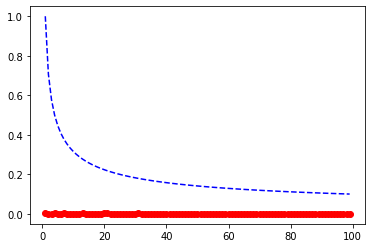

..
----------------------------------------------------------------------
Ran 2 tests in 0.432s

OK


In [80]:
if __name__ == '__main__':
    # Help from user Pierre S. in the stack overflow thread to give the main arguments: 
    # https://stackoverflow.com/questions/49952317/python3-for-unit-test-attributeerror-module-main-has-no-attribute-kerne 
    unittest.main(argv=['first-arg-is-ignored'], exit=False)

# **Discussion**
All tests and graphs seems to give reasonable results. The only test that seems a bit odd is the one for Monte Carlo quadrature over a reference triangle. The red dots that represents that shows the error, seems to converge to zero quite fast. 